Author: Kiril Klein 

In [11]:
import numpy as np
import importlib
from scipy import stats
import fits, vis, as_toolbox #custom moduls
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis#Fisher discriminant
from sklearn import metrics
from IPython.display import Image
import sympy as sp
importlib.reload(vis)

<module 'vis' from 'D:\\Master\\Blok2\\Applied_Statistics\\Exam\\vis.py'>

\textbf{Checklist}
\begin{itemize}
\item Remember to multiply function by binwidth to get right results for chi2 fit
\item Use Ullh for low statistics (tails for example)
\item For Hypothesis testing use: metrics.plot_curve, metrics.RocCurveDisplay
\item For ML classification use sklearn.ensemble.AdaBoostClassifier
\item if N>20 or variance known z-test, else t-test (e.g. stats.ttest_rel)
\item In addition to chi2 one can check with WW runs test \
\item statsmodels.sandbox.stats.runs.runstest_2samp
\end{itemize}

In [2]:
def double_gauss_one_mean(x, N, f, mu, sig1, sig2):
    return binwidth*N*(f*stats.norm.pdf(x,mu,sig1)+(1-f)*stats.norm.pdf(x,mu,sig2))
def gauss(x,N,mu,sig): return binwidth*N*stats.norm.pdf(x,mu,sig)

![title](distr.png) show figure

# Distributions and Probabilites 

\begin{itemize}

\item
\begin{equation}
P(k;n,p) = \binom{n}{k}p^k(1-p)^{n-k}\,.
\end{equation}

\end{itemize}

# Error propagation 


\begin{itemize}

\item

\end{itemize}

# Monte Carlo 

For integration use: sp.integrate(f, (x,a,b)) or for ind. sp. integrate(f, x))\
where x should be a symbol and f should be defined as e.g. f = x**2 + sp.sqrt(x)...

To be normalized  $f(x)$ should fulfill:
\begin{equation}
    \int_{x0}^{x1}dx'\;C\cdot  f(x') =1\,.
\end{equation}
Solving for the constant gives $C \approx \,$.\
The integral $F(x) = \int_{-\infty}^xdx'f(x')$ is 

# Fitting Data 

\begin{itemize}

\item

\end{itemize}

# Statisitcal Tests 

\begin{itemize}

\item

\end{itemize}

In [3]:
number = np.arange(4, 18)
number = np.delete(number, -3)
EC = np.array([
    19.66, 24.60, 29.62, 34.47, 39.38, 44.42, 49.41, 53.91, 59.12, 63.68,
    68.65, 78.34, 83.22
])
s_EC = 0.3

In [40]:
a = 3.2
if type(a)==float:
    print('s')

s


In [146]:
s_EC

0.3

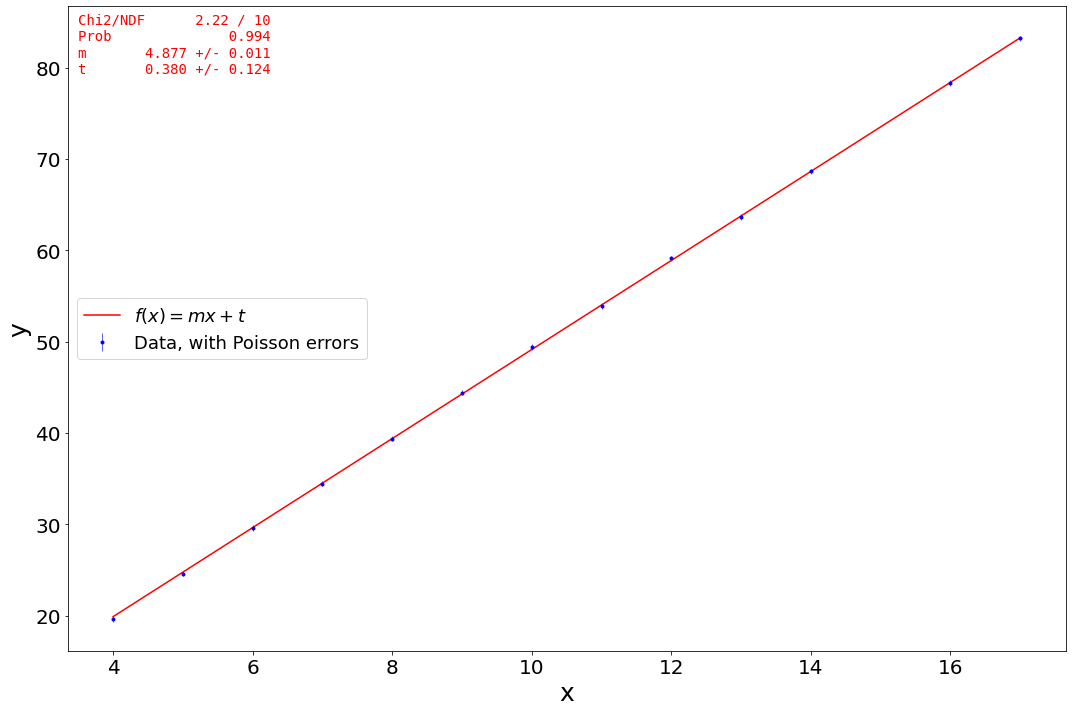

(<AxesSubplot:xlabel='x', ylabel='y'>,
 <Figure size 1080x720 with 1 Axes>,
 array([4.87704453, 0.37985826]),
 [[...]])

In [150]:
importlib.reload(fits)
def f_lin(x,m,t): return m*x + t
fits.chi2_fit_func(number, EC, s_EC, f_lin, [2,0], plot_res =False, 
                       ylabel = 'y', legend_loc = 6, fit_label=r'$f(x) = mx +t$', figsize = (15,10),show_plot = True,
                       save_plot = True, figname = 'test.png', plot_res_distr = False, 
                       inset_bbox = [.9,.7, 4,3], res_legend_loc= 2, res_bins = 20)

![title](test.png)

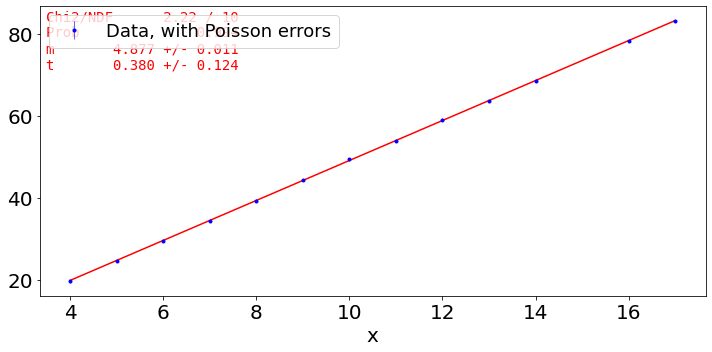

(<AxesSubplot:xlabel='x'>,
 <Figure size 720x360 with 1 Axes>,
 array([4.87704453, 0.37985826]),
 [[...]])

In [25]:

fits.chi2_fit_func(number, EC, s_EC, f_lin, p0 = [2,0] )